In [1]:
import seaborn
import sklearn.cluster
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pylab as pl
from IPython.display import display
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('NYCTicketSummonses.csv', index_col = 0).transpose()

In [3]:
df.columns = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015']
df.head()

,Y2011,Y2012,Y2013,Y2014,Y2015
Backing_Unsafely,1349.0,1217.0,1569.0,2022.0,1369.0
Brake_Lights,27818.0,30283.0,27060.0,22700.0,13927.0
Bus_Lane,7777.0,7756.0,5472.0,2745.0,2892.0
Cell_Phone,162407.0,141816.0,126422.0,106503.0,84630.0
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0


In [4]:
df['PreVZ_Mean'] = (df['Y2011'] + df['Y2012'] + df['Y2013']) / 3
df['PostVZ_Mean'] = (df['Y2014'] + df['Y2015']) / 2
df.head()
df.shape

(38, 7)

In [5]:
df['PercentChange'] = (df['PostVZ_Mean'] - df['PreVZ_Mean']) / df['PreVZ_Mean']
df.dropna(axis = 0, how = 'any', inplace = True)
df.drop(df.index[[-1, -2, -3, -12]], inplace=True)
df.head()
df.shape

(33, 8)

(1.3962541118004774, 0.0050981609190143247)


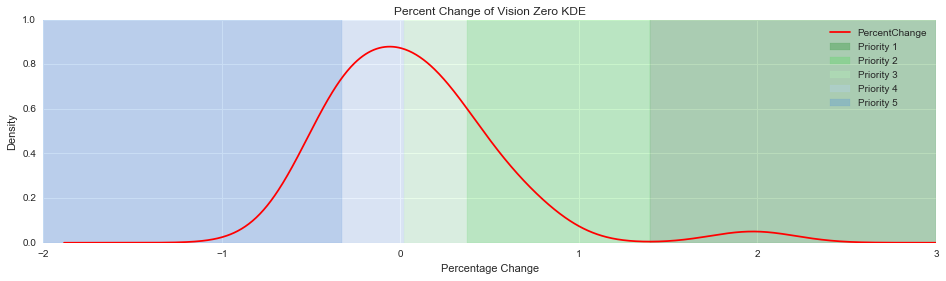

In [32]:
fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))

# Plot KDE of percent change.
ax1 =  df.PercentChange.plot.kde(c = 'r')
ax1.axis([-2, 3, 0, 1])

# Get local minima where x[1:2]
x = [(i,j) for (i,j) in zip(ax1.get_children()[0]._x,
                            ax1.get_children()[0]._y) if i > 1 and i < 2]
minima = min(x, key = lambda t: t[1])

# Plot priority ranges on KDE
pl.axvspan(1.3962541118, 3, color = '#17891F', alpha = 0.3, zorder = 1, label = 'Priority 1')
pl.axvspan(0.372000488296, 1.3962541118, color = '#4CDC55', alpha = 0.3, zorder = 1, label = 'Priority 2')
pl.axvspan(0.0214814108441, 0.372000488296, color = '#B4F6B9', alpha = 0.3, zorder = 1, label = 'Priority 3')
pl.axvspan(-0.329037666608, 0.0214814108441, color = '#B4D3F6', alpha = 0.3, zorder = 1, label = 'Priority 4')
pl.axvspan(-2, -0.329037666608, color = '#4C8FDC', alpha = 0.3, zorder = 1, label = 'Priority 5')
ax1.set_xlabel('Percentage Change')
ax1.set_title('Percent Change of Vision Zero KDE')
ax1.legend()

print minima

In [33]:
df['p'] = df['PercentChange'] > minima[0]
df.sort_values('p', axis = 0, ascending = False, inplace = True)
df.head(1)

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,p
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,1.974159,True


In [34]:
dist = [(i, j) for (i, j) in zip(ax1.get_children()[5]._x,
                            ax1.get_children()[5]._y) if i > minima[0]]
y = [j for (i, j) in dist]
x = [i for (i, j) in dist]

In [35]:
query = df['p'] == False
df1 = df[query]
summary = df1.PercentChange.describe()
print summary[1] - summary[2]
print summary[1]
print summary[1] + summary[2]
print minima[0]

-0.32884531781
0.0187472298528
0.366339777515
1.3962541118


In [37]:
df['zscore'] = sc.mstats.zscore(df.PercentChange)

In [38]:
priority = []
for row in df['PercentChange']:
    if row < summary[1] - summary[2]:
        priority.append(5)
    elif row > summary[1] - summary[2] and row < summary[1]:
        priority.append(4)
    elif row > summary[1] and row < summary[1] + summary[2]:
        priority.append(3)
    elif row > summary[1] + summary[2] and row < minima[0]:
        priority.append(2)
    elif row >= minima[0]:
        priority.append(1)
df['Priority'] = priority
df.sort_values('Priority', axis = 0, ascending = True, inplace = True)
df.drop('p', 1, inplace = True)
df

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,zscore,Priority
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,1.234467e+04,36715.0,1.974159,3.989879,1
Speeding,76493.0,71305.0,83202.0,117767.0,134438.0,7.700000e+04,126102.5,0.637695,1.177701,2
School_Bus_Passing_Stopped,2739.0,3312.0,1371.0,5428.0,3298.0,2.474000e+03,4363.0,0.763541,1.442505,2
Not_Giving_RofW_to_Veh,1951.0,2139.0,2335.0,3365.0,3696.0,2.141667e+03,3530.5,0.648482,1.200400,2
Fail_to_Signal,13879.0,14208.0,18588.0,22088.0,24376.0,1.555833e+04,23232.0,0.493219,0.873696,2
U_Turn,3924.0,3912.0,4921.0,6930.0,4311.0,4.252333e+03,5620.5,0.321745,0.512882,3
Other_Movers,50170.0,60274.0,69088.0,69979.0,75485.0,5.984400e+04,72732.0,0.215360,0.289027,3
Backing_Unsafely,1349.0,1217.0,1569.0,2022.0,1369.0,1.378333e+03,1695.5,0.230109,0.320062,3
ImproperMissing_Plates,2379.0,2473.0,2958.0,3308.0,3329.0,2.603333e+03,3318.5,0.274712,0.413915,3
Following_Too_Closely,1595.0,1129.0,1119.0,1336.0,1345.0,1.281000e+03,1340.5,0.046448,-0.066396,3
